In [1]:
import pandas as pd
# General libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('loan_data.csv')  
print("Loan Prediction Dataset")
print(df.head())

Loan Prediction Dataset
   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                    

In [2]:
print(df.describe())

         person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000  

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
# Identify null values in the dataset 
print(df.isnull().sum())

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


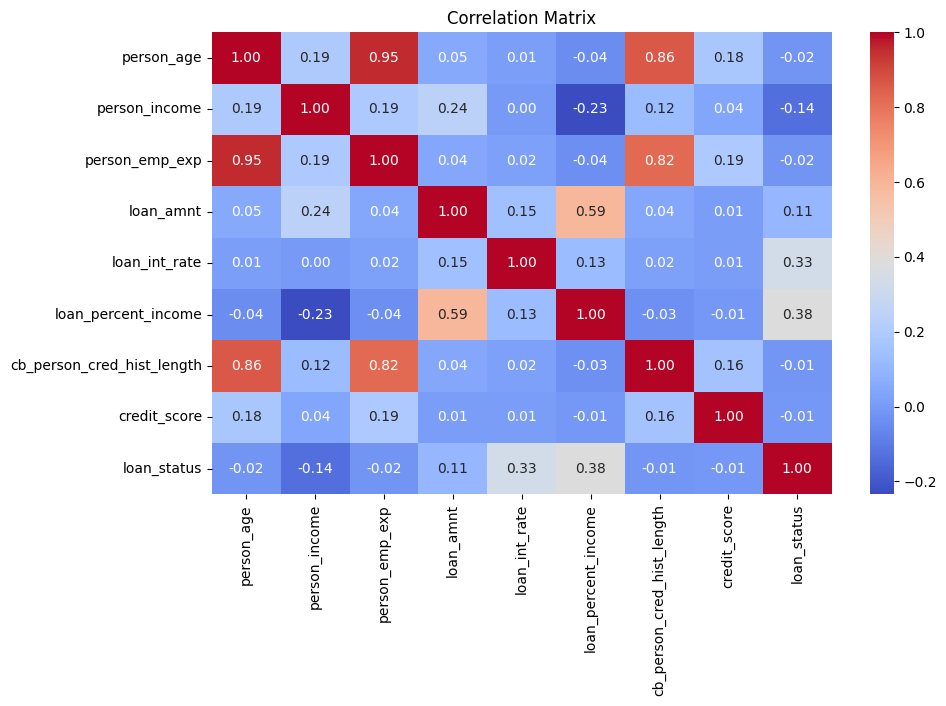

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numeric columns only
numeric_df = df.select_dtypes(include='number')

# Calculate and visualize correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Define the target column
target_column = 'loan_status' 

# Encode categorical features
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

# Separate features and target
X = df.drop(columns=[target_column])  # Drop the actual target column
y = df[target_column]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


SVM Accuracy: 0.9077777777777778
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      6990
           1       0.83      0.74      0.78      2010

    accuracy                           0.91      9000
   macro avg       0.88      0.85      0.86      9000
weighted avg       0.91      0.91      0.91      9000



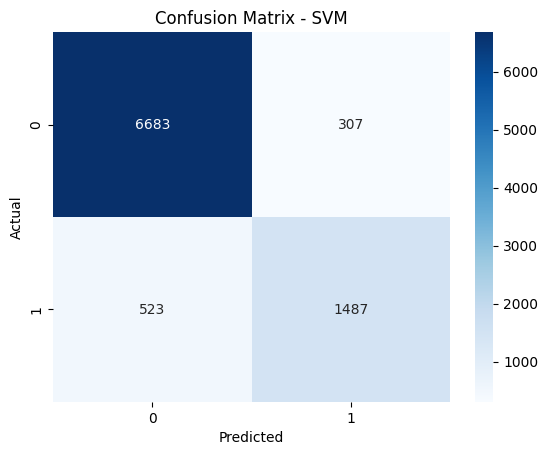

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Decision Tree Accuracy: 0.8981111111111111
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      6990
           1       0.77      0.77      0.77      2010

    accuracy                           0.90      9000
   macro avg       0.85      0.85      0.85      9000
weighted avg       0.90      0.90      0.90      9000



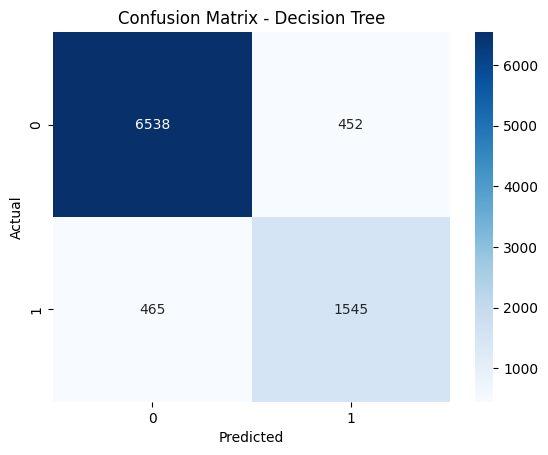

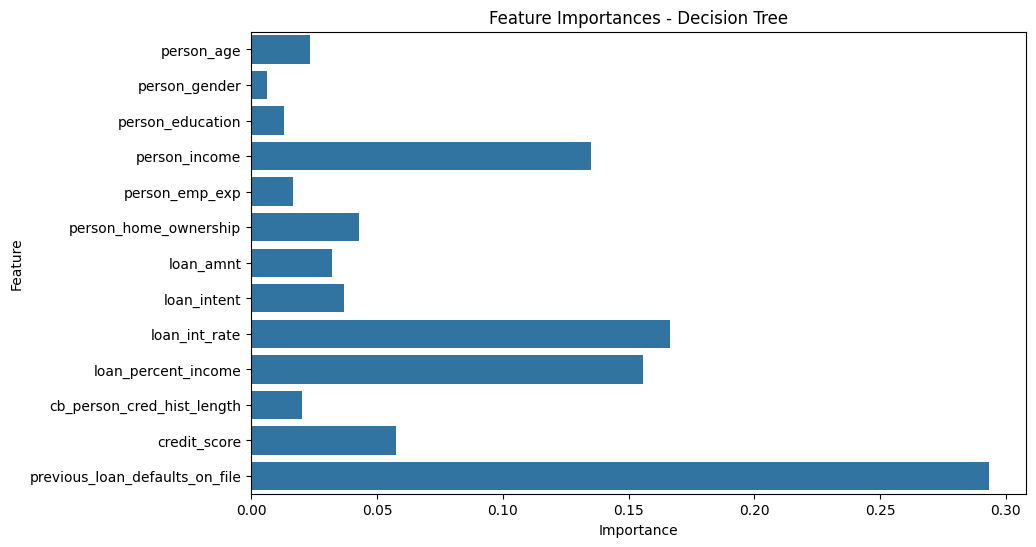

In [ ]:
# Identify Categorical Columns
categorical_cols = df.select_dtypes(include=['object']).columns  

# Encode Categorical Variables
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Define Features (X) and Target (y)
X = df.drop(columns=['loan_status']) 
y = df['loan_status']

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Numerical Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize Feature Importance
feature_importances = dt_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importances - Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


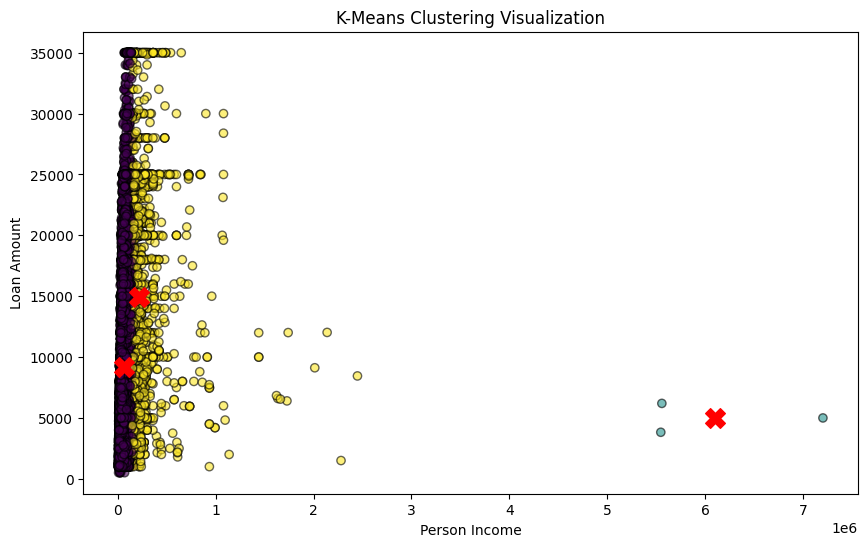

In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


# Load your dataset
loan_data = pd.read_csv("loan_data.csv")

# Ensure X is defined with the relevant features
X = loan_data[['person_income', 'loan_amnt']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Plot K-Means Clustering
plt.figure(figsize=(10, 6))
plt.scatter(X['person_income'], X['loan_amnt'], c=kmeans.labels_, cmap='viridis', alpha=0.6, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.xlabel("Person Income")
plt.ylabel("Loan Amount")
plt.title("K-Means Clustering Visualization")
plt.show()

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

KNN Accuracy: 0.8082222222222222
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      6990
           1       0.61      0.38      0.47      2010

    accuracy                           0.81      9000
   macro avg       0.73      0.66      0.68      9000
weighted avg       0.79      0.81      0.79      9000



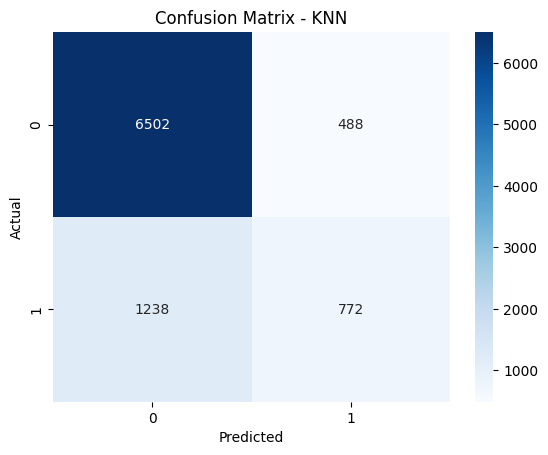

In [16]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Encode Categorical Variables
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Define Features (X) and Target (y)
X = df.drop(columns=['loan_status']) 
y = df['loan_status']

# Dimensionality Reduction with PCA
pca = PCA(n_components=10)  
X = pca.fit_transform(X)

# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the KNN Model (with Parallel Computation)
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)  
knn_model.fit(X_train, y_train)

# Make Predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


KNN Accuracy: 0.8918888888888888
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      6990
           1       0.79      0.71      0.75      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.83      0.84      9000
weighted avg       0.89      0.89      0.89      9000



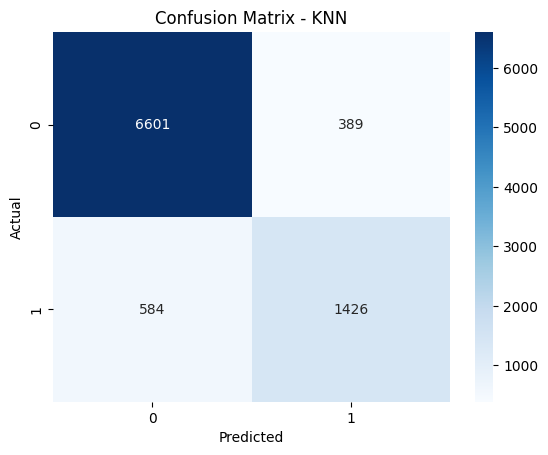

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Load the Dataset
df = pd.read_csv('loan_data.csv')  

# Encode Categorical Variables
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Define Features (X) and Target (y)
X = df.drop(columns=['loan_status']) 
y = df['loan_status']

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Numerical Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train, y_train)

# Make Predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Cluster assignments:
 Cluster  loan_status
0        0              34997
         1              10000
1        0                  3
dtype: int64


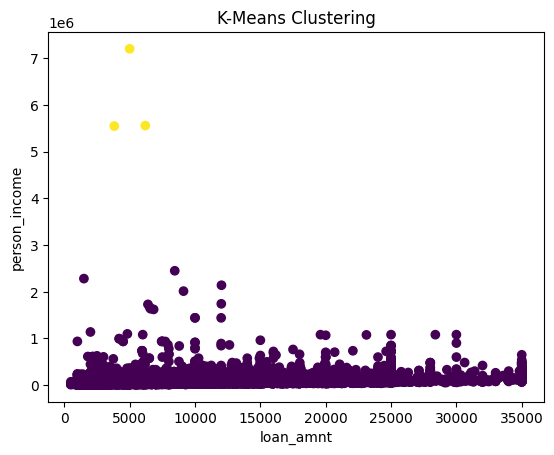

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X) 

# Add clusters to the dataset for analysis
df['Cluster'] = clusters

# Analyze cluster assignments
print("Cluster assignments:\n", df.groupby(['Cluster', 'loan_status']).size())

# Visualize clusters using two selected features
feature1 = 'loan_amnt' 
feature2 = 'person_income' 

plt.scatter(df[feature1], df[feature2], c=clusters, cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()